In [44]:
import pandas as pd
import os
import glob

from functools import reduce
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [45]:
# Load all csv files from the Customer Data folder and put them in a dataframe list for later merge

In [3]:
data_directory = "Customer Data/"
print(os.listdir(data_directory))
df_list = [] 
for file in os.listdir(data_directory):
    df = pd.read_csv(file) 
    print(df.dtypes)
    df_list.append(df) 

['Customer Attrition Status.csv', 'Customer Demographics.csv', 'Customer Investment Snapshot.csv', 'Customer Portfolio Snapshot.csv']
RowNumber       int64
CustomerId    float64
Exited        float64
dtype: object
RowNumber       int64
CustomerId    float64
Surname        object
Geography      object
Gender         object
Age           float64
dtype: object
RowNumber            int64
CustomerId         float64
Tenure             float64
CreditScore        float64
Balance            float64
EstimatedSalary    float64
dtype: object
RowNumber           int64
CustomerId          int64
NumOfProducts     float64
HasChckng         float64
IsActiveMember    float64
dtype: object


In [4]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['CustomerId'],
                                            how='inner'), df_list)

In [5]:
df_merged.sample(10)

,RowNumber_x,CustomerId,Exited,RowNumber_y,Surname,Geography,Gender,Age,RowNumber_x,Tenure,CreditScore,Balance,EstimatedSalary,RowNumber_y,NumOfProducts,HasChckng,IsActiveMember
3799,3798,15669887.0,1.0,3798,Lambert,West,Female,51.0,3798,3.0,839.0,NaN,69101.23,3798,1.0,1.0,1.0
5416,5415,15600357.0,0.0,5415,Findlay,West,Female,40.0,5415,1.0,495.0,140197.71,150720.39,5415,2.0,1.0,0.0
5690,5689,15682021.0,0.0,5689,Lai,East,Male,23.0,5689,6.0,471.0,104592.55,131736.23,5689,2.0,1.0,0.0
1973,1974,15635728.0,0.0,1974,P'an,West,Male,41.0,1974,4.0,693.0,NaN,156381.47,1974,2.0,0.0,0.0
9039,9038,15792862.0,1.0,9038,Blinova,East,Male,41.0,9038,1.0,653.0,104584.11,15126.32,9038,1.0,1.0,0.0
6976,6975,15715643.0,0.0,6975,Ijendu,West,Male,44.0,6975,8.0,662.0,NaN,175314.87,6975,2.0,1.0,1.0
4174,4173,15757777.0,0.0,4173,Pai,West,Female,35.0,4173,2.0,636.0,NaN,23129.46,4173,2.0,1.0,1.0
5049,5048,15790412.0,0.0,5048,Norton,Central,Male,26.0,5048,8.0,471.0,NaN,179655.87,5048,2.0,1.0,1.0
6654,6653,15714380.0,0.0,6653,Butcher,West,Male,38.0,6653,5.0,827.0,NaN,103305.01,6653,2.0,0.0,0.0
7525,7524,15733602.0,0.0,7524,Rubin,Central,Female,72.0,7524,2.0,814.0,NaN,130853.03,7524,2.0,0.0,1.0


In [6]:
df_merged = df_merged.drop(df_merged.filter(regex='RowNumber').columns, axis=1)

In [7]:
df_merged.sample(10)

,CustomerId,Exited,Surname,Geography,Gender,Age,Tenure,CreditScore,Balance,EstimatedSalary,NumOfProducts,HasChckng,IsActiveMember
7772,15809509.0,0.0,Venables,West,Male,29.0,3.0,699.0,125689.29,151623.71,1.0,1.0,1.0
4132,15731669.0,0.0,Szabados,West,Male,39.0,2.0,554.0,129709.62,173197.12,1.0,1.0,0.0
4953,15649793.0,0.0,Lovely,West,Male,20.0,7.0,658.0,NaN,187638.34,2.0,0.0,0.0
9844,15746704.0,0.0,Jibunoh,Central,Male,30.0,9.0,638.0,136808.53,106642.97,2.0,1.0,1.0
1181,15624428.0,0.0,Longo,East,Female,24.0,7.0,651.0,40224.70,178341.33,1.0,1.0,1.0
6595,15581332.0,0.0,Pan,East,Female,30.0,1.0,655.0,83173.98,184259.60,2.0,1.0,1.0
9836,15799358.0,1.0,Vincent,West,Female,46.0,6.0,516.0,62212.29,171681.86,1.0,0.0,1.0
7711,15574119.0,0.0,Okwuadigbo,Central,Female,64.0,1.0,598.0,62979.93,152273.57,1.0,1.0,1.0
7156,15659100.0,0.0,Lane,West,Male,33.0,9.0,605.0,128152.82,147822.81,1.0,0.0,0.0
5922,15640648.0,0.0,Howe,West,Male,36.0,6.0,698.0,NaN,19231.98,2.0,0.0,1.0


In [8]:
# Describe the data set
df_merged.describe()

,CustomerId,Exited,Age,Tenure,CreditScore,Balance,EstimatedSalary,NumOfProducts,HasChckng,IsActiveMember
count,1.000200e+04,10002.000000,10002.000000,10002.000000,9999.00000,6385.000000,10002.000000,10002.000000,10002.000000,10002.000000
mean,1.569097e+07,0.203859,38.943711,5.014797,650.50075,119841.627383,100105.624356,1.530494,0.705359,0.514997
std,7.195055e+04,0.402886,10.612675,2.902953,96.69932,30100.935329,57515.031841,0.581967,0.455904,0.499800
min,1.556570e+07,0.000000,18.000000,0.000000,305.00000,3768.690000,11.580000,1.000000,0.000000,0.000000
25%,1.562854e+07,0.000000,32.000000,3.000000,584.00000,100194.440000,51012.472500,1.000000,0.000000,0.000000
50%,1.569074e+07,0.000000,37.000000,5.000000,652.00000,119852.010000,100218.210000,1.000000,1.000000,1.000000
75%,1.575331e+07,0.000000,44.000000,7.000000,717.50000,139529.930000,149400.922500,2.000000,1.000000,1.000000
max,1.581569e+07,1.000000,190.000000,30.000000,865.00000,250898.090000,199992.480000,4.000000,1.000000,1.000000


In [37]:
print(len(df_merged))

10002


In [36]:
# Check for Duplicates in the CustomerId column since the CustomerId column is the key that has been used for the merge.

df_merged.duplicated().sum()

2

In [38]:
# Dropping duplicates in the data set
df_merged.drop_duplicates(keep=False,inplace=True)

In [39]:
print(len(df_merged))

9999


In [11]:
#Use the pandas functions like duplicated(), describe(), unique(), isnull().sum(), skew(), corr() to get the details out of your dataframe.
df_merged.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
9997     False
9998     False
9999     False
10000    False
10001    False
Length: 10002, dtype: bool

<AxesSubplot:>

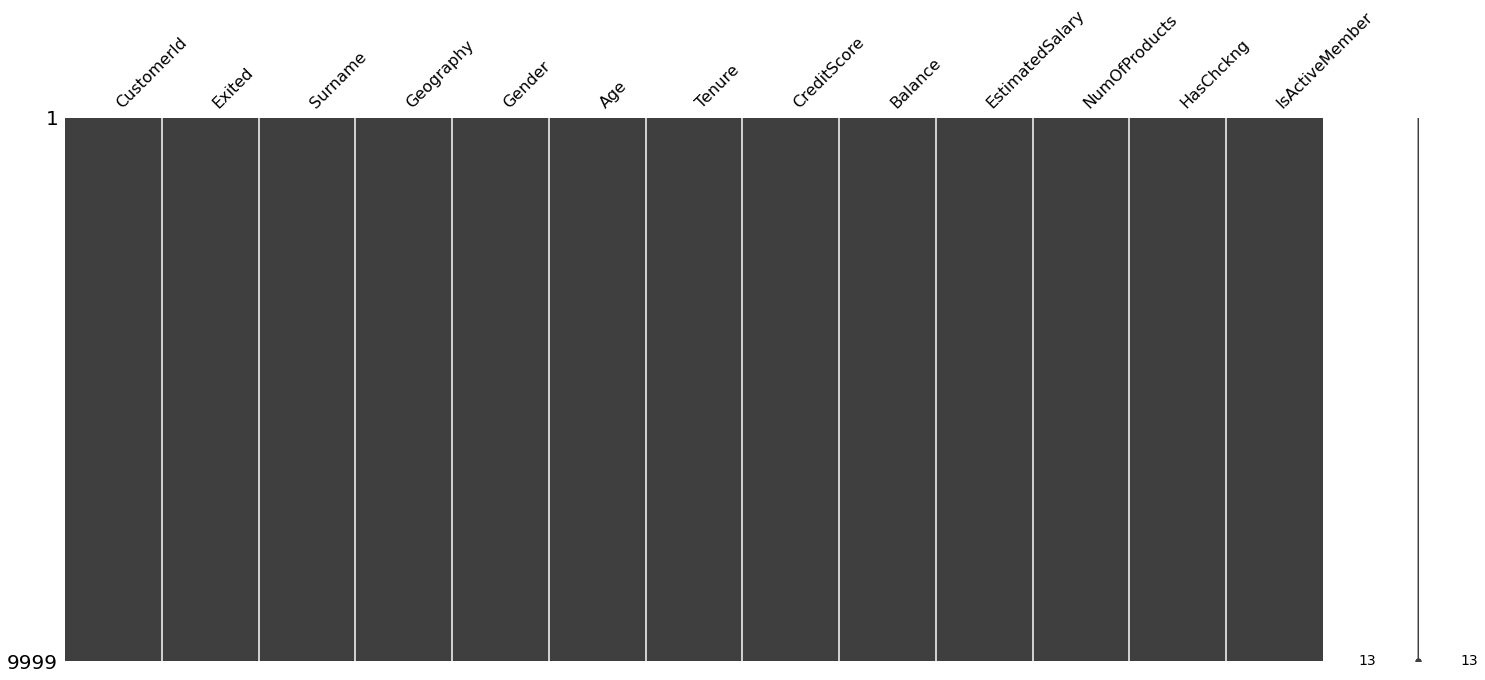

In [46]:
msno.matrix(df_merged)

In [12]:
df_merged.describe()

,CustomerId,Exited,Age,Tenure,CreditScore,Balance,EstimatedSalary,NumOfProducts,HasChckng,IsActiveMember
count,1.000200e+04,10002.000000,10002.000000,10002.000000,9999.00000,6385.000000,10002.000000,10002.000000,10002.000000,10002.000000
mean,1.569097e+07,0.203859,38.943711,5.014797,650.50075,119841.627383,100105.624356,1.530494,0.705359,0.514997
std,7.195055e+04,0.402886,10.612675,2.902953,96.69932,30100.935329,57515.031841,0.581967,0.455904,0.499800
min,1.556570e+07,0.000000,18.000000,0.000000,305.00000,3768.690000,11.580000,1.000000,0.000000,0.000000
25%,1.562854e+07,0.000000,32.000000,3.000000,584.00000,100194.440000,51012.472500,1.000000,0.000000,0.000000
50%,1.569074e+07,0.000000,37.000000,5.000000,652.00000,119852.010000,100218.210000,1.000000,1.000000,1.000000
75%,1.575331e+07,0.000000,44.000000,7.000000,717.50000,139529.930000,149400.922500,2.000000,1.000000,1.000000
max,1.581569e+07,1.000000,190.000000,30.000000,865.00000,250898.090000,199992.480000,4.000000,1.000000,1.000000


In [14]:
df_merged.isnull()

,CustomerId,Exited,Surname,Geography,Gender,Age,Tenure,CreditScore,Balance,EstimatedSalary,NumOfProducts,HasChckng,IsActiveMember
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,False,False,False,False,False,False,False,False,True,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False
9999,False,False,False,False,False,False,False,False,True,False,False,False,False
10000,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df_merged.isnull().sum()
# Balance Column hass the maximum amount of missing values - 3617


CustomerId            0
Exited                0
Surname               0
Geography             0
Gender                0
Age                   0
Tenure                0
CreditScore           3
Balance            3617
EstimatedSalary       0
NumOfProducts         0
HasChckng             0
IsActiveMember        0
dtype: int64

In [16]:
# Filling missing values for the Balance and CreditScore column
df_merged['Balance'] = df_merged['Balance'].fillna(df_merged['Balance'].median())
df_merged['CreditScore'] = df_merged['CreditScore'].fillna(df_merged['CreditScore'].median())

In [17]:
df_merged.isnull().sum()

CustomerId         0
Exited             0
Surname            0
Geography          0
Gender             0
Age                0
Tenure             0
CreditScore        0
Balance            0
EstimatedSalary    0
NumOfProducts      0
HasChckng          0
IsActiveMember     0
dtype: int64

In [67]:
df_merged.corr(method='spearman').style.background_gradient(cmap="RdBu", vmin = -1, vmax =1)

,CustomerId,Exited,Age,Tenure,CreditScore,Balance,EstimatedSalary,NumOfProducts,HasChckng,IsActiveMember
CustomerId,1.000000,-0.006608,0.008312,-0.014990,0.006334,-0.012275,0.015018,0.018976,-0.013760,0.001860
Exited,-0.006608,1.000000,0.323687,-0.013357,-0.023687,0.007144,0.011819,-0.125719,-0.006834,-0.155963
Age,0.008312,0.323687,1.000000,-0.010591,-0.007544,-0.004826,-0.002836,-0.058299,-0.015161,0.039495
Tenure,-0.014990,-0.013357,-0.010591,1.000000,0.000592,0.007010,0.007991,0.013517,0.022326,-0.028995
CreditScore,0.006334,-0.023687,-0.007544,0.000592,1.000000,-0.005020,0.000684,0.012802,-0.004197,0.024489
Balance,-0.012275,0.007144,-0.004826,0.007010,-0.005020,1.000000,-0.000309,-0.002736,0.014864,-0.012057
EstimatedSalary,0.015018,0.011819,-0.002836,0.007991,0.000684,-0.000309,1.000000,0.012319,-0.009836,-0.011333
NumOfProducts,0.018976,-0.125719,-0.058299,0.013517,0.012802,-0.002736,0.012319,1.000000,0.004154,0.016492
HasChckng,-0.013760,-0.006834,-0.015161,0.022326,-0.004197,0.014864,-0.009836,0.004154,1.000000,-0.012027
IsActiveMember,0.001860,-0.155963,0.039495,-0.028995,0.024489,-0.012057,-0.011333,0.016492,-0.012027,1.000000


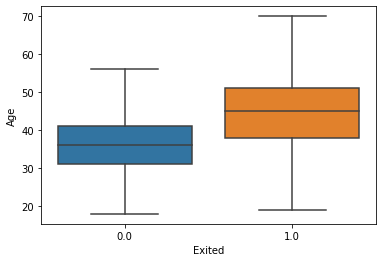

In [62]:
sns.boxplot(x='Exited', y='Age', data=df_merged, sym='')
plt.show()

<AxesSubplot:ylabel='Geography,Exited'>

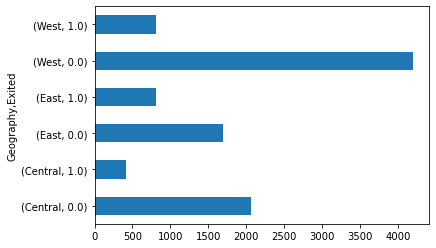

In [64]:
df_merged.groupby('Geography')['Exited'] .value_counts().plot.barh(figsize=(6,4))

<AxesSubplot:ylabel='Geography,Gender'>

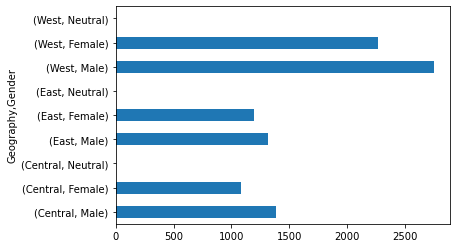

In [65]:
df_merged.groupby('Geography')['Gender'] .value_counts().plot.barh(figsize=(6,4))